# Exploring Data from the World Bank API with Python: Retrieval, Transformation, and Visualization
In this notebook, you will learn how to use Python to interact with the World Bank's REST API, retrieve data in JSON format, and transform it into a structured DataFrame. The example was divided into three sections:

**Request to the World Bank API**

Using Python, access the World Bank's REST API to fetch data using the requests library.

**Data Transformation**

This involves parsing a valid JSON string and converting it into a Python list with the json package. Then converting the list it into a structured DataFrame with the Pandas library. Lastly, using the pandas library, perform final transformations on the DataFrame, making it available for further analysis.

**Data Analysis and Visualization**

With the final DataFrame, perform simple analysis and visualizations.

## Import packages

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## 1. Request to the World Bank API
Sent a get request to read the World Bank API to obtain GDP information from 2000 to 2022 for Greece, Brazil and the United States.

In [2]:
url = r'https://api.worldbank.org/v2/country/GR;BR;US/indicator/NY.GDP.MKTP.CD/'

myParams = {
    'format':'json',
    'per_page':'5000',
    'date':'2000:2022'
}

data = requests.get(url, params=myParams)

Check the status code of the API request.

In [3]:
print(f'Request status code: {data.status_code}')

Request status code: 200


Preview the string response.

In [4]:
print(data.text[:500])

[{"page":1,"pages":1,"per_page":5000,"total":69,"sourceid":"2","lastupdated":"2024-02-21"},[{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"BR","value":"Brazil"},"countryiso3code":"BRA","date":"2022","value":1920095779022.73,"unit":"","obs_status":"","decimal":0},{"indicator":{"id":"NY.GDP.MKTP.CD","value":"GDP (current US$)"},"country":{"id":"BR","value":"Brazil"},"countryiso3code":"BRA","date":"2021","value":1649622821885.14,"unit":"","obs_status":"","decimal"


## 2. Data Transformation
### String to Python object
The json.loads() method can be used to parse a valid JSON string and convert it into a Python object. It is mainly used for deserializing native string, byte, or byte array which consists of JSON data into Python Dictionary.

In [5]:
json_data = json.loads(data.text)

In [6]:
print(f'Data type: {type(json_data)} ')
print(f'Number of elements: {len(json_data)}')

Data type: <class 'list'> 
Number of elements: 2


View the first element in the JSON array. Notice that it is an object with information about the API request.

In [7]:
json_data[0]

{'page': 1,
 'pages': 1,
 'per_page': 5000,
 'total': 69,
 'sourceid': '2',
 'lastupdated': '2024-02-21'}

Preview the second element in the JSON array. Notice that it is an array of objects. Each object contains GDP information about each country.

In [8]:
json_data[1][:5]

[{'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2022',
  'value': 1920095779022.73,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2021',
  'value': 1649622821885.14,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2020',
  'value': 1476107231194.11,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (current US$)'},
  'country': {'id': 'BR', 'value': 'Brazil'},
  'countryiso3code': 'BRA',
  'date': '2019',
  'value': 1873288205186.45,
  'unit': '',
  'obs_status': '',
  'decimal': 0},
 {'indicator': {'id': 'NY.GD

### Python object to DataFrame

Convert the array of objects to a DataFrame.

In [9]:
gdp_raw_df = pd.json_normalize(json_data[1])
gdp_raw_df.head(20)

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,BRA,2022,1.920096e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
1,BRA,2021,1.649623e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
2,BRA,2020,1.476107e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
3,BRA,2019,1.873288e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
4,BRA,2018,1.916934e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
5,BRA,2017,2.063515e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
6,BRA,2016,1.795693e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
7,BRA,2015,1.802212e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
8,BRA,2014,2.456044e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil
9,BRA,2013,2.472820e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),BR,Brazil


View the data types in the DataFrame.

In [10]:
gdp_raw_df.dtypes

countryiso3code     object
date                object
value              float64
unit                object
obs_status          object
decimal              int64
indicator.id        object
indicator.value     object
country.id          object
country.value       object
dtype: object

### Prepare the DataFrame.

In [11]:
## Specify the columns to drop
dropColumns = ['unit', 'obs_status', 'decimal', 'country.id', 'indicator.id']

## Create a function to rename columns by replacing a . with an _
def rename_columns(col):
    newColName = col.replace('.','_')
    return newColName

## Create a new DataFrame
gdp_df = (
    gdp_raw_df
    .drop(columns = dropColumns)                           ## Drop unncessary columns
    .rename(columns = rename_columns)                      ## Rename columns by replacing . to an _
    .assign(
        date = lambda _df: _df.date.astype('int16')        ## Convert the object year value to an integer
    )
)

## Preview the final DataFrame
display(gdp_df.head(5), gdp_df.tail(5))

,countryiso3code,date,value,indicator_value,country_value
0,BRA,2022,1.920096e+12,GDP (current US$),Brazil
1,BRA,2021,1.649623e+12,GDP (current US$),Brazil
2,BRA,2020,1.476107e+12,GDP (current US$),Brazil
3,BRA,2019,1.873288e+12,GDP (current US$),Brazil
4,BRA,2018,1.916934e+12,GDP (current US$),Brazil


,countryiso3code,date,value,indicator_value,country_value
64,USA,2004,1.221719e+13,GDP (current US$),United States
65,USA,2003,1.145644e+13,GDP (current US$),United States
66,USA,2002,1.092911e+13,GDP (current US$),United States
67,USA,2001,1.058193e+13,GDP (current US$),United States
68,USA,2000,1.025095e+13,GDP (current US$),United States


### Simple data exploration

View the count of countries in the DataFrame.

In [12]:
(gdp_df
 .country_value
 .value_counts()
)

country_value
Brazil           23
Greece           23
United States    23
Name: count, dtype: int64

View descriptive statistics of each country.

In [13]:
(gdp_df
 .loc[:, ['country_value', 'value']]
 .groupby('country_value')
 .describe()
 .T
)

country_value        Brazil        Greece  United States
value count    2.300000e+01  2.300000e+01   2.300000e+01
      mean     1.583849e+12  2.311057e+11   1.632247e+13
      std      6.789983e+11  5.859323e+10   4.191850e+12
      min      5.097953e+11  1.304578e+11   1.025095e+13
      25%      9.996302e+11  1.977640e+11   1.342739e+13
      50%      1.695855e+12  2.175813e+11   1.559973e+13
      75%      1.991805e+12  2.607111e+11   1.908622e+13
      max      2.616156e+12  3.559087e+11   2.543970e+13

## 3. Create a Visualization

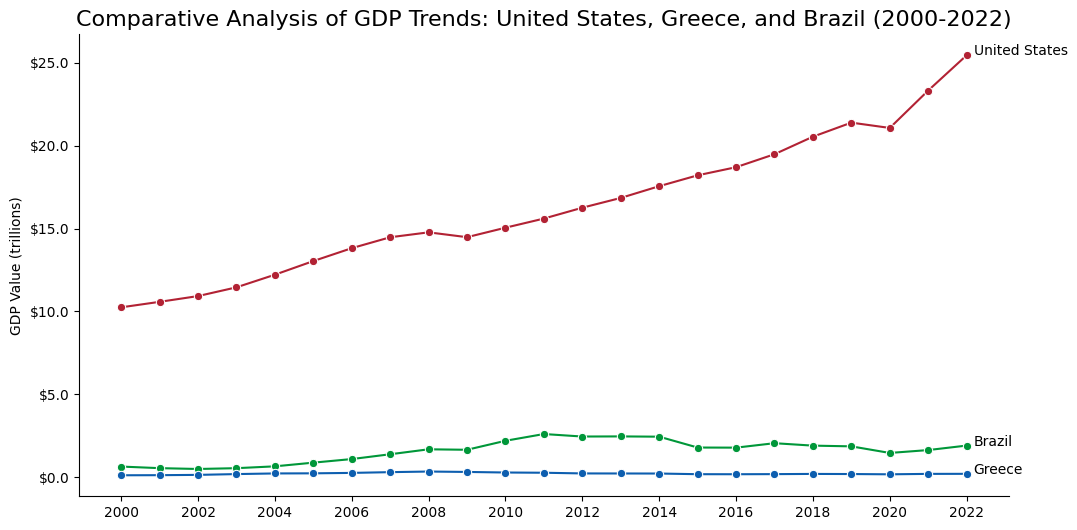

In [14]:
## Set colors for the lines for each country
countryColors = {
    'United States': '#b22234',
    'Greece':'#0d5EAF',
    'Brazil':'#009739'
}


## 
## PLOT
##
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(ax=ax, data=gdp_df, x='date', y='value', 
             hue='country_value', 
             palette=countryColors, 
             marker='o', 
             legend=False)

## Add end of line labels for each country
lineLabels = (
    gdp_df
    .query("date == 2022")
    .loc[:,['date','country_value','value']]
)
for index, row in lineLabels.iterrows():
    ax.annotate(row[1],xy=(row[0]+.18,row[2]))

## Format the y axis
def format_trillions(x,pos):
    return f'${x/1000000000000}'
ax.yaxis.set_major_formatter(FuncFormatter(format_trillions))
ax.set_ylabel('GDP Value (trillions)');

## Format the x axis
minXvalue=gdp_df.date.min()
maxXvlaue=gdp_df.date.max()+2
ax.xaxis.set_ticks(np.arange(minXvalue, maxXvlaue, 2))
ax.set_xlabel('')

## Add title
titleFmt = {
    'fontsize':16,
}
ax.set_title('Comparative Analysis of GDP Trends: United States, Greece, and Brazil (2000-2022)', fontdict=titleFmt)

## Remove spines
ax.spines[['right', 'top']].set_visible(False)